In [1]:
import pandas as pd
import numpy as num
import plotly.graph_objects as go


## Reading file and cleaning

In [2]:
df = pd.read_csv("paho_who_cases_reported_latest.csv")
df.columns=df.columns.str.lower().str.replace(" ","_")
df.columns=df.columns.str.replace("laboratory_confirmed_cases","confirmed_cases")
df.columns=df.columns.str.replace("country_/_territory","country_or_territory")
df['suspected_cases'] = pd.to_numeric(df['suspected_cases'].str.replace(",", ""), errors='coerce')
df['measure_values'] = pd.to_numeric(df['measure_values'].str.replace(",", ""), errors='coerce')
df.head()

,country_or_territory,measure_names,month_of_date,report_epi_week,year_of_date,country_or_territory.1,date,measure_values,confirmed_cases,suspected_cases
0,Aruba,Suspected,January,1,2016,Aruba,"January, 2016",0,0,0
1,Aruba,Confirmed,January,1,2016,Aruba,"January, 2016",0,0,0
2,Aruba,Suspected,January,2,2016,Aruba,"January, 2016",0,0,0
3,Aruba,Confirmed,January,2,2016,Aruba,"January, 2016",0,0,0
4,Aruba,Suspected,January,3,2016,Aruba,"January, 2016",0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country_or_territory    1216 non-null   object
 1   measure_names           1216 non-null   object
 2   month_of_date           1216 non-null   object
 3   report_epi_week         1216 non-null   int64 
 4   year_of_date            1216 non-null   int64 
 5   country_or_territory.1  1216 non-null   object
 6   date                    1216 non-null   object
 7   measure_values          1216 non-null   int64 
 8   confirmed_cases         1216 non-null   int64 
 9   suspected_cases         1216 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 95.1+ KB


In [4]:
df.describe()

,report_epi_week,year_of_date,measure_values,confirmed_cases,suspected_cases
count,1216.000000,1216.000000,1216.000000,1216.000000,1216.000000
mean,31.761513,2015.335526,62.967928,4.689145,121.246711
std,20.136097,0.472368,409.422238,29.792762,572.334785
min,1.000000,2015.000000,0.000000,0.000000,0.000000
25%,5.000000,2015.000000,0.000000,0.000000,0.000000
50%,43.000000,2015.000000,0.000000,0.000000,0.000000
75%,48.000000,2016.000000,0.000000,0.000000,0.000000
max,52.000000,2016.000000,5737.000000,526.000000,5737.000000


In [5]:
nan=df.isnull().sum().reset_index()
non_nan=df.notnull().sum().reset_index()
print(nan,non_nan)

                    index  0
0    country_or_territory  0
1           measure_names  0
2           month_of_date  0
3         report_epi_week  0
4            year_of_date  0
5  country_or_territory.1  0
6                    date  0
7          measure_values  0
8         confirmed_cases  0
9         suspected_cases  0                     index     0
0    country_or_territory  1216
1           measure_names  1216
2           month_of_date  1216
3         report_epi_week  1216
4            year_of_date  1216
5  country_or_territory.1  1216
6                    date  1216
7          measure_values  1216
8         confirmed_cases  1216
9         suspected_cases  1216


In [6]:
new_df=df.drop(columns=['date',"measure_names",'country_or_territory.1'])
new_df

,country_or_territory,month_of_date,report_epi_week,year_of_date,measure_values,confirmed_cases,suspected_cases
0,Aruba,January,1,2016,0,0,0
1,Aruba,January,1,2016,0,0,0
2,Aruba,January,2,2016,0,0,0
3,Aruba,January,2,2016,0,0,0
4,Aruba,January,3,2016,0,0,0
...,...,...,...,...,...,...,...
1211,Venezuela,December,50,2015,0,0,0
1212,Venezuela,December,51,2015,0,0,0
1213,Venezuela,December,51,2015,0,0,0
1214,Venezuela,December,52,2015,0,0,0


In [7]:
new_df=new_df.drop_duplicates(subset=['country_or_territory', 'report_epi_week'], keep='first')
new_df

,country_or_territory,month_of_date,report_epi_week,year_of_date,measure_values,confirmed_cases,suspected_cases
0,Aruba,January,1,2016,0,0,0
2,Aruba,January,2,2016,0,0,0
4,Aruba,January,3,2016,0,0,0
6,Aruba,January,4,2016,0,0,0
8,Barbados,January,1,2016,0,3,0
...,...,...,...,...,...,...,...
1206,Venezuela,December,48,2015,0,0,0
1208,Venezuela,December,49,2015,0,0,0
1210,Venezuela,December,50,2015,0,0,0
1212,Venezuela,December,51,2015,0,0,0


In [8]:
total_values=new_df['confirmed_cases']+new_df['suspected_cases']
new_df['measure_values']=total_values
new_df

C:\Users\E.Mina\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country_or_territory,month_of_date,report_epi_week,year_of_date,measure_values,confirmed_cases,suspected_cases
0,Aruba,January,1,2016,0,0,0
2,Aruba,January,2,2016,0,0,0
4,Aruba,January,3,2016,0,0,0
6,Aruba,January,4,2016,0,0,0
8,Barbados,January,1,2016,3,3,0
...,...,...,...,...,...,...,...
1206,Venezuela,December,48,2015,0,0,0
1208,Venezuela,December,49,2015,0,0,0
1210,Venezuela,December,50,2015,0,0,0
1212,Venezuela,December,51,2015,0,0,0


In [9]:
new_df['confirmed_percentage']=(new_df['confirmed_cases']/new_df['measure_values'])*100

new_df.fillna(value=0)                                           

C:\Users\E.Mina\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,country_or_territory,month_of_date,report_epi_week,year_of_date,measure_values,confirmed_cases,suspected_cases,confirmed_percentage
0,Aruba,January,1,2016,0,0,0,0.0
2,Aruba,January,2,2016,0,0,0,0.0
4,Aruba,January,3,2016,0,0,0,0.0
6,Aruba,January,4,2016,0,0,0,0.0
8,Barbados,January,1,2016,3,3,0,100.0
...,...,...,...,...,...,...,...,...
1206,Venezuela,December,48,2015,0,0,0,0.0
1208,Venezuela,December,49,2015,0,0,0,0.0
1210,Venezuela,December,50,2015,0,0,0,0.0
1212,Venezuela,December,51,2015,0,0,0,0.0


In [10]:
new_df['suspected_percentage']=(new_df['suspected_cases']/new_df['measure_values'])*100

new_df.fillna(value=0) 

C:\Users\E.Mina\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,country_or_territory,month_of_date,report_epi_week,year_of_date,measure_values,confirmed_cases,suspected_cases,confirmed_percentage,suspected_percentage
0,Aruba,January,1,2016,0,0,0,0.0,0.0
2,Aruba,January,2,2016,0,0,0,0.0,0.0
4,Aruba,January,3,2016,0,0,0,0.0,0.0
6,Aruba,January,4,2016,0,0,0,0.0,0.0
8,Barbados,January,1,2016,3,3,0,100.0,0.0
...,...,...,...,...,...,...,...,...,...
1206,Venezuela,December,48,2015,0,0,0,0.0,0.0
1208,Venezuela,December,49,2015,0,0,0,0.0,0.0
1210,Venezuela,December,50,2015,0,0,0,0.0,0.0
1212,Venezuela,December,51,2015,0,0,0,0.0,0.0


## Analysis on the data

In [11]:
con_susRate_per_month = pd.pivot_table(new_df, values =['confirmed_percentage','suspected_percentage'],index =['month_of_date']).reset_index()
  
con_susRate_per_month.sort_values(by=['confirmed_percentage','suspected_percentage'], ascending=False)

,month_of_date,confirmed_percentage,suspected_percentage
5,May,100.000000,0.000000
2,January,51.710571,48.289429
1,February,49.711281,50.288719
4,March,40.979689,59.020311
6,November,34.322941,65.677059
7,October,32.134139,67.865861
0,December,26.313806,73.686194
3,July,0.000000,100.000000


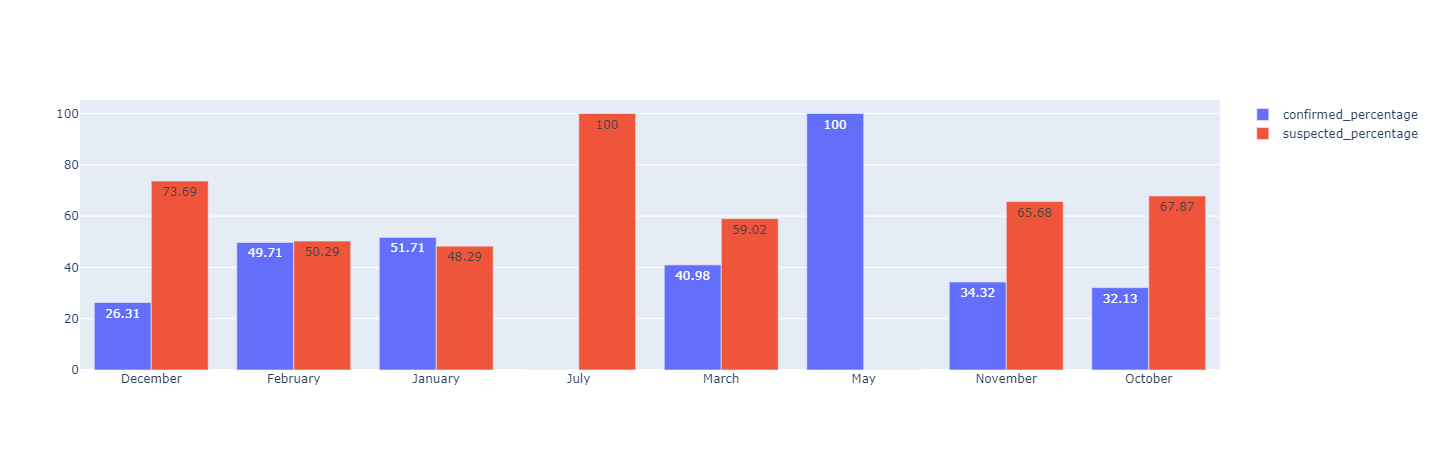

In [31]:
data=[]
for col in con_susRate_per_month.columns:
    if col!= 'month_of_date':
        data.append(go.Bar(name=col,x=con_susRate_per_month['month_of_date'],y=con_susRate_per_month[col].tolist(),text=round(con_susRate_per_month[col],2),textposition='auto'))
fig = go.Figure(data)
fig.show() 

In [44]:
month_names = ['January','February','March','May','July','October','November','December']
table = pd.pivot_table(new_df, values=['suspected_percentage'], index=['month_of_date'],
                    columns=['country_or_territory'], fill_value=0)
table.columns = [column[1] for column in table.columns]
table.index = [month_names.index(x) for x in table.index]
table.sort_index(inplace=True)
table

,Aruba,Barbados,Bolivia,Bonaire,Brazil,Colombia,Costa Rica,Curacao,Dominican Republic,Ecuador,...,Panama,Paraguay,Puerto Rico,Saint Martin,Saint Vincent and the Grenadines,Sint Maarten,Suriname,Trinidad and Tobago,United States Virgin Islands,Venezuela
0,0,0.000000,0,0,0.000000,96.459118,0,0,86.486486,0.000000,...,0,0,0,0.000000,0,0,100.00,0,0.000000,100.000000
1,0,0.000000,0,0,73.394031,98.364429,0,0,97.900262,49.568966,...,0,0,0,82.888889,0,0,100.00,0,49.166667,0.000000
2,0,99.283154,0,0,0.000000,0.000000,0,0,0.000000,0.000000,...,0,0,0,0.000000,0,0,0.00,0,77.777778,0.000000
3,0,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,...,0,0,0,0.000000,0,0,0.00,0,0.000000,0.000000
4,0,0.000000,0,0,100.000000,0.000000,0,0,0.000000,0.000000,...,0,0,0,0.000000,0,0,0.00,0,0.000000,0.000000
5,0,0.000000,0,0,0.000000,51.798791,0,0,0.000000,0.000000,...,0,0,0,0.000000,0,0,100.00,0,0.000000,0.000000
6,0,0.000000,0,0,0.000000,92.038360,0,0,0.000000,0.000000,...,0,0,0,0.000000,0,0,93.75,0,0.000000,42.857143
7,0,0.000000,0,0,0.000000,97.661411,0,0,0.000000,0.000000,...,0,0,0,0.000000,0,0,100.00,0,0.000000,0.000000


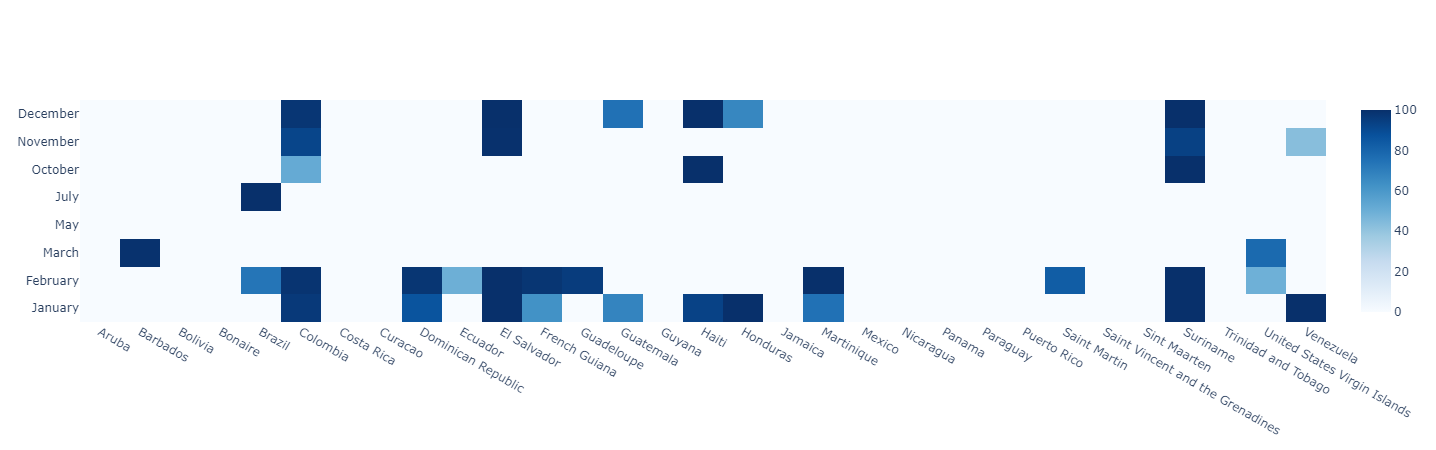

In [46]:
fig = go.Figure(data=go.Heatmap(
                   z=table.values,
                   y=[month_names[x] for x in table.index],
                   x=table.columns,
                   hoverongaps = False,colorscale = 'blues'))
fig.show()

In [47]:
month_names = ['January','February','March','May','July','October','November','December']
table = pd.pivot_table(new_df, values=['confirmed_percentage'], index=['month_of_date'],
                    columns=['country_or_territory'], fill_value=0)
table.columns = [column[1] for column in table.columns]
table.index = [month_names.index(x) for x in table.index]
table.sort_index(inplace=True)
table

,Aruba,Barbados,Bolivia,Bonaire,Brazil,Colombia,Costa Rica,Curacao,Dominican Republic,Ecuador,...,Panama,Paraguay,Puerto Rico,Saint Martin,Saint Vincent and the Grenadines,Sint Maarten,Suriname,Trinidad and Tobago,United States Virgin Islands,Venezuela
0,0,100.000000,100,0,0.000000,3.540882,100,100,13.513514,100.000000,...,100,0,100,100.000000,0,0,0.00,0,100.000000,0.000000
1,100,100.000000,0,100,26.605969,1.635571,100,0,2.099738,50.431034,...,100,0,0,17.111111,100,100,0.00,100,50.833333,0.000000
2,0,0.716846,0,0,0.000000,0.000000,0,0,0.000000,0.000000,...,0,0,0,0.000000,0,0,0.00,0,22.222222,0.000000
3,0,0.000000,0,0,100.000000,0.000000,0,0,0.000000,0.000000,...,0,0,0,0.000000,0,0,0.00,0,0.000000,0.000000
4,0,0.000000,0,0,0.000000,0.000000,0,0,0.000000,0.000000,...,0,0,0,0.000000,0,0,0.00,0,0.000000,0.000000
5,0,0.000000,0,0,0.000000,48.201209,0,0,0.000000,0.000000,...,0,0,0,0.000000,0,0,0.00,0,0.000000,0.000000
6,0,0.000000,0,0,0.000000,7.961640,0,0,0.000000,0.000000,...,100,100,0,0.000000,0,0,6.25,0,0.000000,57.142857
7,0,0.000000,0,0,0.000000,2.338589,0,0,0.000000,0.000000,...,100,0,100,0.000000,0,0,0.00,0,0.000000,0.000000


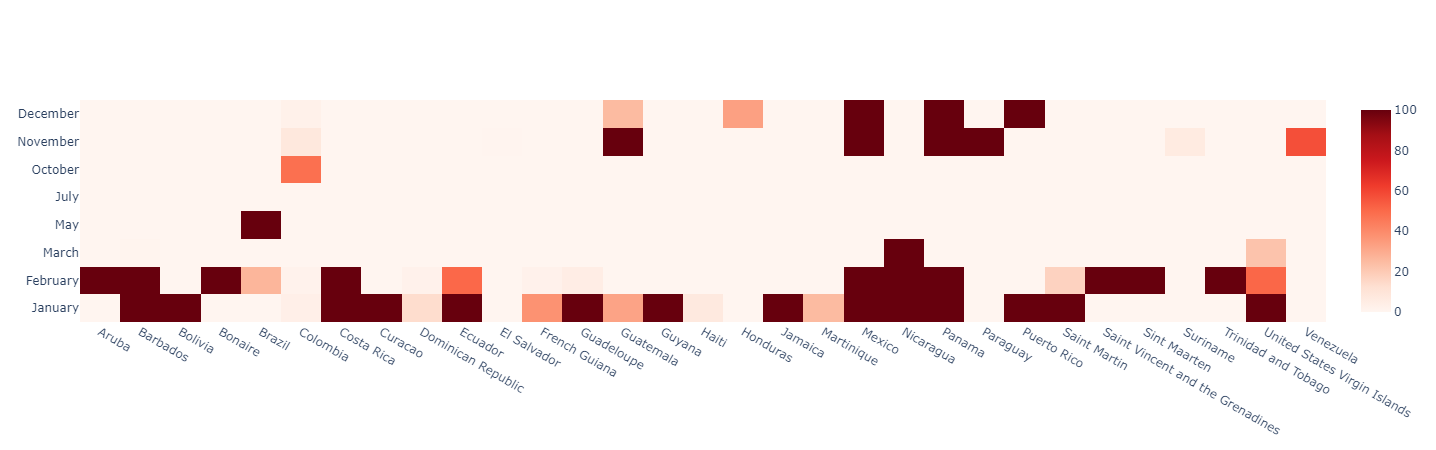

In [48]:
fig = go.Figure(data=go.Heatmap(
                   z=table.values,
                   y=[month_names[x] for x in table.index],
                   x=table.columns,
                   hoverongaps = False,colorscale = 'Reds'))
fig.show()

## No. confirmed/suspected cases for each country/territory

In [17]:
table = pd.pivot_table(new_df, values =['confirmed_cases','suspected_cases'],index =['country_or_territory'],aggfunc=num.sum).reset_index()
  
table.sort_values(by=['confirmed_cases','suspected_cases'], ascending=False)


,country_or_territory,confirmed_cases,suspected_cases
5,Colombia,1612,41094
4,Brazil,534,1490
19,Mexico,121,0
13,Guatemala,105,278
11,French Guiana,102,1030
20,Nicaragua,92,0
21,Panama,86,0
9,Ecuador,40,115
12,Guadeloupe,35,389
23,Puerto Rico,30,0


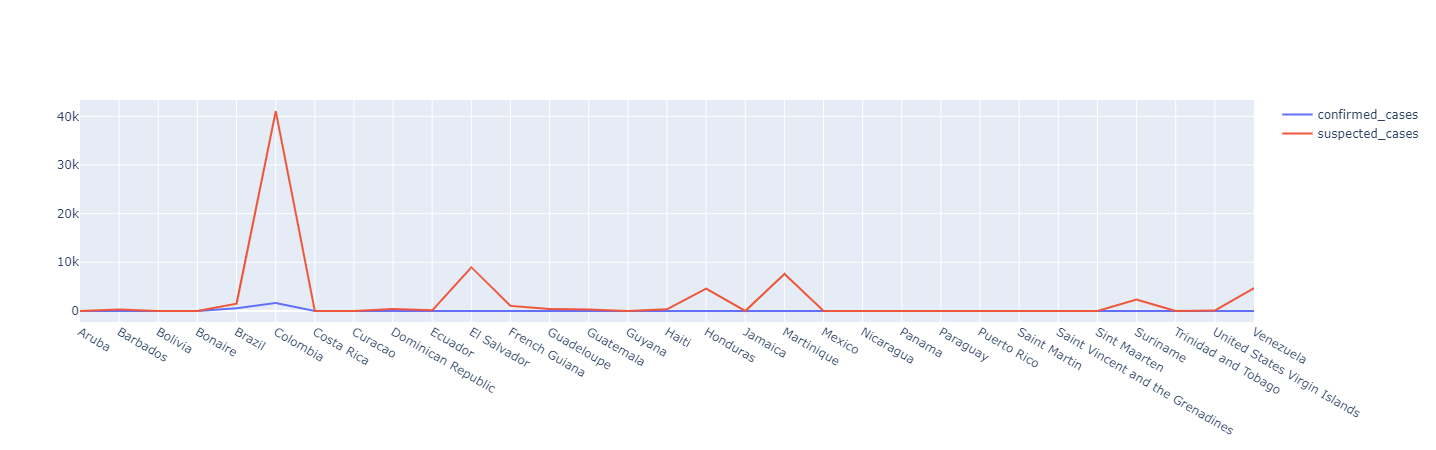

In [18]:
data=[]
for col in table.columns:
    if col!= 'country_or_territory':
        data.append(go.Scatter(name=col,x=table['country_or_territory'],y=table[col].tolist()))
fig = go.Figure(data)
fig.show() 

## No. confirmed/suspected cases for each week of a year 

In [19]:
casesTypes_per_week= pd.pivot_table(new_df, values =['confirmed_cases','suspected_cases'],index =['report_epi_week','year_of_date'],aggfunc=num.sum).reset_index()
casesTypes_per_week

,report_epi_week,year_of_date,confirmed_cases,suspected_cases
0,1,2016,67,2973
1,2,2016,117,6775
2,3,2016,331,7573
3,4,2016,362,14622
4,5,2016,225,7093
5,6,2016,724,10589
6,7,2016,88,8306
7,8,2016,28,0
8,9,2016,8,284
9,19,2015,8,0


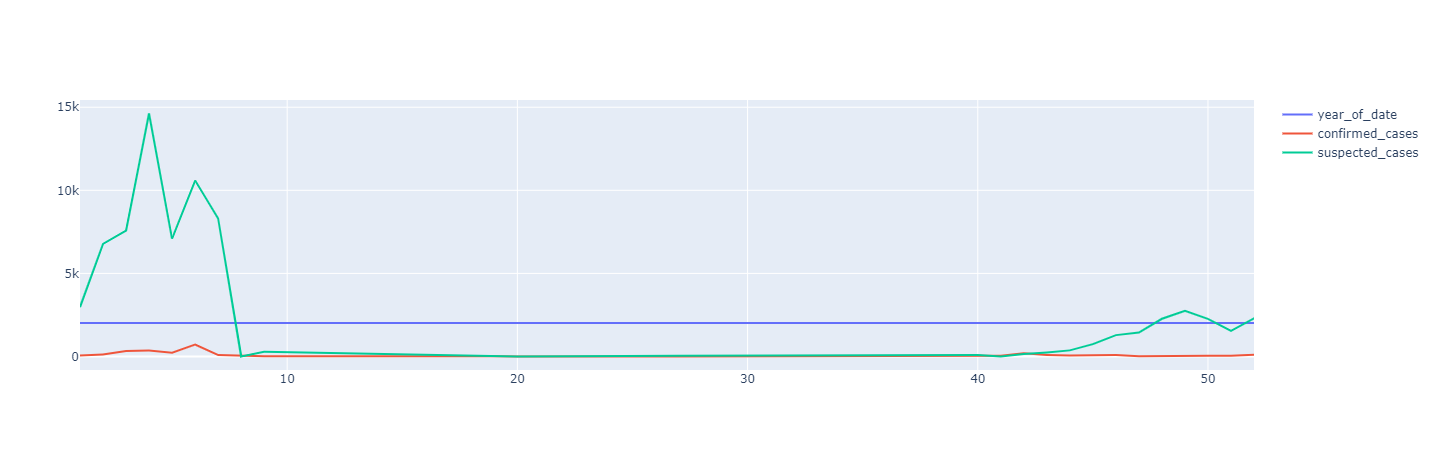

In [20]:
data=[]
for col in casesTypes_per_week.columns:
    if col!= 'report_epi_week':
        data.append(go.Scatter(name=col,x=casesTypes_per_week['report_epi_week'],y=casesTypes_per_week[col].tolist(),text=casesTypes_per_week[col],textposition='top center'))
fig = go.Figure(data)
fig.show() 

## the average no. cases per year

In [21]:
average_cases_per_year=new_df.groupby('year_of_date',as_index=False)['measure_values'].mean()
average_cases_per_year

,year_of_date,measure_values
0,2015,40.603960
1,2016,294.926471


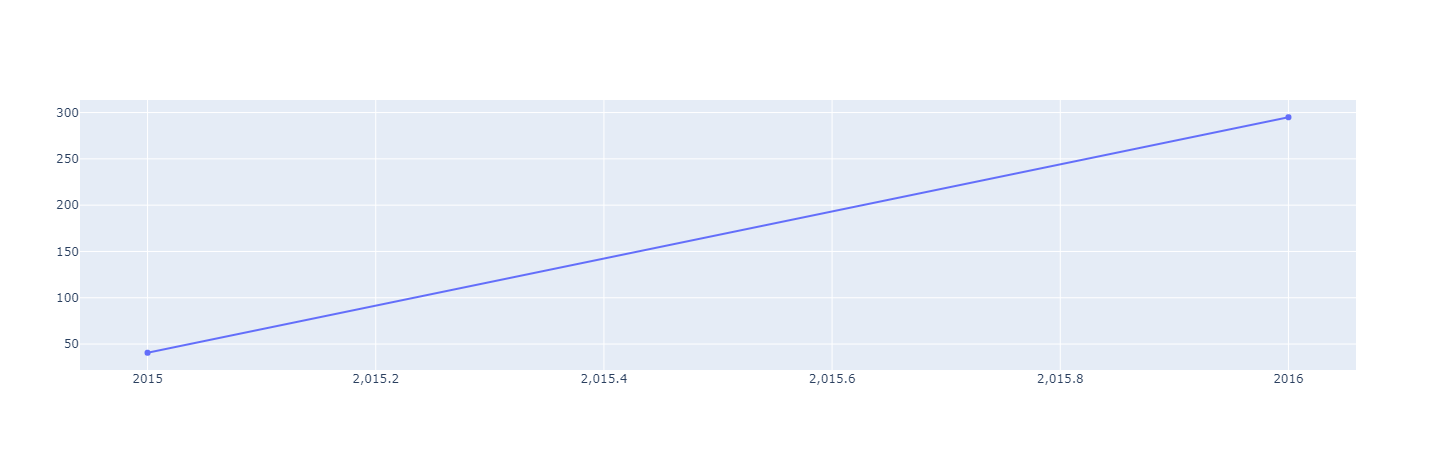

In [22]:
fig = go.Figure(data=go.Scatter(x=average_cases_per_year['year_of_date'], y=average_cases_per_year['measure_values']))
fig.show()

## the  average no. cases for each month

In [23]:
average_cases_per_month=new_df.groupby('month_of_date',as_index=False)['measure_values'].mean()
average_cases_per_month

,month_of_date,measure_values
0,December,73.696774
1,February,351.337662
2,January,264.677419
3,July,39.000000
4,March,97.333333
5,May,4.000000
6,November,33.631148
7,October,6.701613


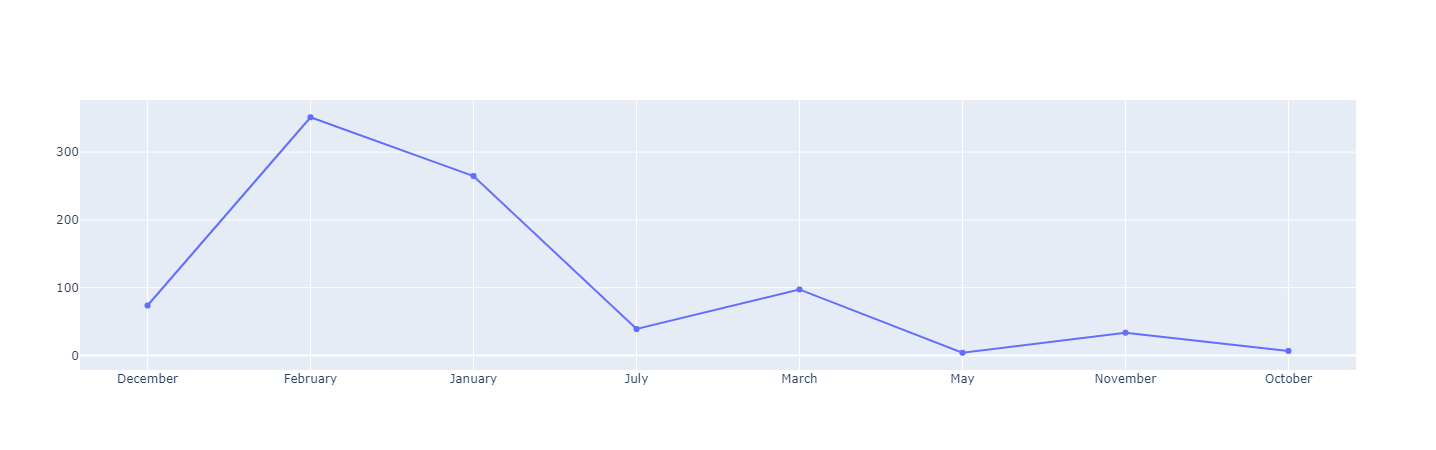

In [24]:
fig = go.Figure(data=go.Scatter(x=average_cases_per_month['month_of_date'], y=average_cases_per_month['measure_values']))
fig.show()

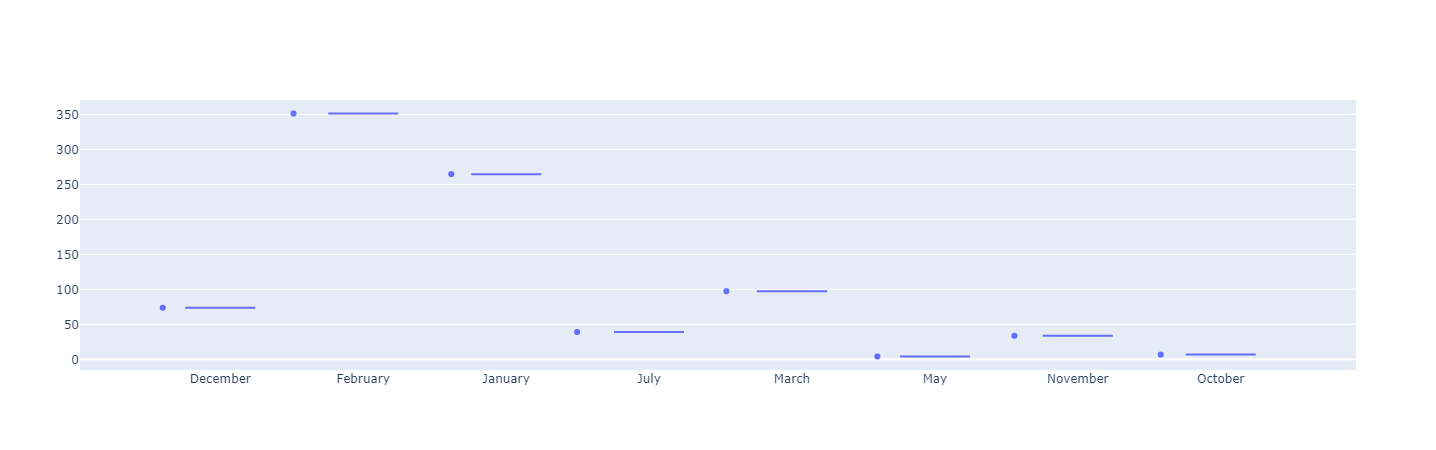

In [25]:
fig = go.Figure(data=[go.Box(x=average_cases_per_month['month_of_date'],y=average_cases_per_month['measure_values'],
            boxpoints='all',
            jitter=0.3, 
            pointpos=-1.8 
              )])
fig.show()

In [26]:
REW_per_year=pd.crosstab(new_df['report_epi_week'], new_df['year_of_date']).reset_index()
REW_per_year

year_of_date,report_epi_week,2015,2016
0,1,0,31
1,2,0,31
2,3,0,31
3,4,0,31
4,5,0,31
5,6,0,21
6,7,0,19
7,8,0,6
8,9,0,3
9,19,1,0


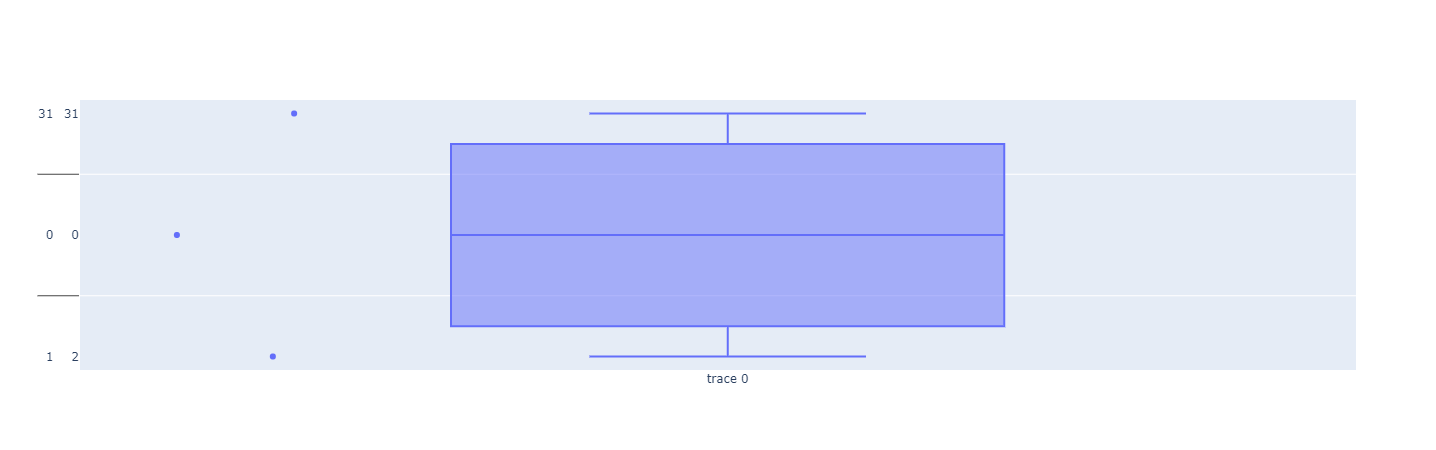

In [49]:
fig = go.Figure(data=[go.Box(y=REW_per_year,
            boxpoints='all', 
            jitter=0.3, 
            pointpos=-1.8, 
            boxmean=True
              )])

fig.show()